In [49]:
# Imports

# If you are using a Jupyter notebook, uncomment the following line.
#%matplotlib inline

import requests
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk
from PIL import Image
from io import BytesIO
import Tkinter, tkFileDialog
from nltk.tokenize import word_tokenize




In [58]:
def FilePicker():
    root = Tkinter.Tk()
    root.withdraw()
    image_path = tkFileDialog.askopenfilename()
    return image_path

def GetCaption(image_path):
    subscription_key = "562b4aae17574c63b7c2896b0e9836a4"
    assert subscription_key

    vision_base_url = "https://westcentralus.api.cognitive.microsoft.com/vision/v2.0/"

    analyze_url = vision_base_url + "analyze"

    # image_path = "C:/Neeraj_Personal/TakeAway/Projects/beach.jpg"

    image_data = open(image_path, "rb").read()
    headers    = {'Ocp-Apim-Subscription-Key': subscription_key,
                  'Content-Type': 'application/octet-stream'}
    params     = {'visualFeatures': 'Categories,Description,Color'}
    response = requests.post(
        analyze_url, headers=headers, params=params, data=image_data)
    response.raise_for_status()

    # The 'analysis' object contains various fields that describe the image. The most
    # relevant caption for the image is obtained from the 'description' property.
    analysis = response.json()
#     print(analysis)
    image_caption = analysis["description"]["captions"][0]["text"].capitalize()

    # # Display the image and overlay it with the caption.
    image = Image.open(BytesIO(image_data))
#     plt.imshow(image)
#     plt.axis("off")
#     _ = plt.title(image_caption, size="x-large", y=-0.1)
    return image_caption

def GetQuotesByKeyword(keyword):
    # Neethi's code goes here
    return ["sample"]

def RemoveStopWords(tokenized_words):
    stop_words = stopwords.words('english')
    return [word for word in tokenized_words if word not in stop_words]

def GetAllQuotes(image_path):
    sentence = GetCaption(image_path)
    sentence = sentence.lower()
    words = RemoveStopWords(word_tokenize(sentence))
    quotes = []
    for word in words:
        quotes = quotes + (GetQuotesByKeyword(str(word)))
    return quotes


In [54]:
def main():
    image_path = FilePicker()
    quotes = GetAllQuotes(image_path)
    print(quotes)
    

['sample', 'sample', 'sample']


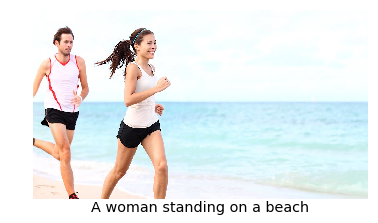

In [57]:
main()